# In Depth A/B Testing - Lab

## Introduction

In this lab, you'll explore a survey from Kaggle regarding budding data scientists. With this, you'll form some initial hypotheses, and test them using the tools you've acquired to date. 

## Objectives

You will be able to:
* Conduct statistical tests on a real-world dataset

## Load the Dataset and Perform a Brief Exploration

The data is stored in a file called **multipleChoiceResponses_cleaned.csv**. Feel free to check out the original dataset referenced at the bottom of this lab, although this cleaned version will undoubtedly be easier to work with. Additionally, meta-data regarding the questions is stored in a file name **schema.csv**. Load in the data itself as a Pandas DataFrame, and take a moment to briefly get acquainted with it.

> Note: If you can't get the file to load properly, try changing the encoding format as in `encoding='latin1'`

In [74]:
#Your code here
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import scipy.stats as stats

In [76]:
data = pd.read_csv('multipleChoiceResponses_cleaned.csv')
print(len(data.columns))
data.head()


230


,GenderSelect,Country,Age,EmploymentStatus,StudentStatus,LearningDataScience,CodeWriter,CareerSwitcher,CurrentJobTitleSelect,TitleFit,...,JobFactorTitle,JobFactorCompanyFunding,JobFactorImpact,JobFactorRemote,JobFactorIndustry,JobFactorLeaderReputation,JobFactorDiversity,JobFactorPublishingOpportunity,exchangeRate,AdjustedCompensation
0,"Non-binary, genderqueer, or gender non-conforming",NaN,NaN,Employed full-time,NaN,NaN,Yes,NaN,DBA/Database Engineer,Fine,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Female,United States,30.0,"Not employed, but looking for work",NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,Somewhat important,NaN,NaN,NaN,NaN
2,Male,Canada,28.0,"Not employed, but looking for work",NaN,NaN,NaN,NaN,NaN,NaN,...,Very Important,Very Important,Very Important,Very Important,Very Important,Very Important,Very Important,Very Important,NaN,NaN
3,Male,United States,56.0,"Independent contractor, freelancer, or self-em...",NaN,NaN,Yes,NaN,Operations Research Practitioner,Poorly,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,250000.0
4,Male,Taiwan,38.0,Employed full-time,NaN,NaN,Yes,NaN,Computer Scientist,Fine,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Wages and Education

You've been asked to determine whether education is impactful to salary. Develop a hypothesis test to compare the salaries of those with Master's degrees to those with Bachelor's degrees. Are the two statistically different according to your results?

> Note: The relevant features are stored in the 'FormalEducation' and 'AdjustedCompensation' features.

In [82]:
#Your code here
bachelors = data[data.FormalEducation == "Bachelor's degree"].AdjustedCompensation
bachelors = bachelors[bachelors.notnull() == True]
bachelors_mean = round(bachelors.mean(),2)
masters = data[data.FormalEducation == "Master's degree"].AdjustedCompensation
masters = masters[masters.notnull() == True]
masters_mean = round(masters.mean(),2)
print(f'Mean salary: bachelor--{bachelors.mean()}, masters--{masters.mean()}')
print(f'Median salary: bachelor--{bachelors.median()}, masters--{masters.median()}')
print(f'std: bachelor--{bachelors.std()}, masters--{masters.std()}')
print('Now, let us explore if this difference is statistically significant:\n')

Mean salary: bachelor--64887.09799461879, masters--69139.89987120005
Median salary: bachelor--38399.4, masters--53812.17000000001
std: bachelor--306935.87238797836, masters--135527.20850458278
Now, let us explore if this difference is statistically significant:



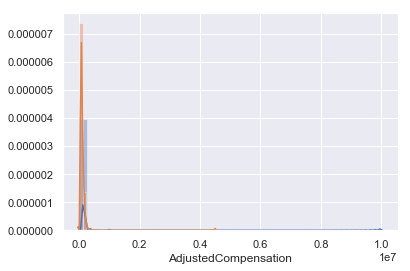

In [112]:
sns.distplot(bachelors, bins = 40)
sns.distplot(masters, bins = 40)
plt.show()

In [95]:
for i in np.linspace(0.8,1,21):
    print (f'bachelors {round(bachelors.quantile(i),1)} vs. masters {round(masters.quantile(i),1)} at {round(i*100,2)}%')

bachelors 93233.1 vs. masters 103000.0 at 80.0%
bachelors 95572.8 vs. masters 107009.0 at 81.0%
bachelors 99276.4 vs. masters 110000.0 at 82.0%
bachelors 100000.0 vs. masters 111503.8 at 83.0%
bachelors 103040.0 vs. masters 115240.4 at 84.0%
bachelors 105935.0 vs. masters 119582.6 at 85.0%
bachelors 110000.0 vs. masters 120000.0 at 86.0%
bachelors 112000.0 vs. masters 124719.9 at 87.0%
bachelors 115000.0 vs. masters 129421.5 at 88.0%
bachelors 120000.0 vs. masters 130000.0 at 89.0%
bachelors 120346.5 vs. masters 135000.0 at 90.0%
bachelors 126460.0 vs. masters 140000.0 at 91.0%
bachelors 132615.4 vs. masters 149640.0 at 92.0%
bachelors 140000.0 vs. masters 150000.0 at 93.0%
bachelors 143408.8 vs. masters 160000.0 at 94.0%
bachelors 150000.0 vs. masters 166778.6 at 95.0%
bachelors 179849.7 vs. masters 180000.0 at 96.0%
bachelors 195000.0 vs. masters 200000.0 at 97.0%
bachelors 200000.0 vs. masters 211100.0 at 98.0%
bachelors 250000.0 vs. masters 250000.0 at 99.0%
bachelors 9999999.0 vs.

In [111]:
stats.ttest_ind(bachelors,masters, equal_var=False)

Ttest_indResult(statistic=-0.43786693335411514, pvalue=0.6615527890254489)

In [135]:
bachelors_modified = bachelors[bachelors < bachelors.quantile(0.98)]
masters_modified = masters[masters < masters.quantile(0.98)]
stats.ttest_ind(bachelors_modified,masters_modified, equal_var=False)

Ttest_indResult(statistic=-6.74850841720402, pvalue=1.8751556333212378e-11)

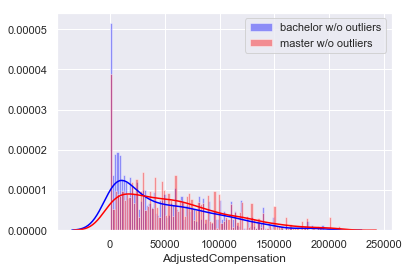

In [136]:
sns.distplot(bachelors_modified, bins = 100, color = 'blue', label = 'bachelor w/o outliers')
sns.distplot(masters_modified, bins = 100, color = 'red', label = 'master w/o outliers')
plt.legend()
plt.show()

## Wages and Education II

Now perform a similar statistical test comparing the AdjustedCompensation of those with Bachelor's degrees and those with Doctorates. If you haven't already, be sure to explore the distribution of the AdjustedCompensation feature for any anomalies. 

In [137]:
doctors = data[data.FormalEducation == "Doctoral degree"].AdjustedCompensation
doctors = doctors[doctors.notnull() == True]
doctors_mean = round(doctors.mean(),2)
print(f'Mean salary: bachelor--{bachelors.mean()}, doctors--{doctors.mean()}')
print(f'Median salary: bachelor--{bachelors.median()}, doctors--{doctors.median()}')
print(f'std: bachelor--{bachelors.std()}, doctors--{doctors.std()}')
print('Now, let us explore if this difference is statistically significant:\n')

Mean salary: bachelor--64887.09799461879, doctors--29566175.76245311
Median salary: bachelor--38399.4, doctors--74131.91999999997
std: bachelor--306935.87238797836, doctors--909998082.3346782
Now, let us explore if this difference is statistically significant:



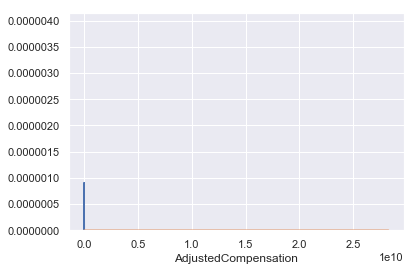

In [138]:
sns.distplot(bachelors, bins = 40)
sns.distplot(doctors, bins = 40)
plt.show()

In [139]:
for i in np.linspace(0.8,1,21):
    print (f'bachelors {round(bachelors.quantile(i),1)} vs. doctors {round(doctors.quantile(i),1)} at {round(i*100,2)}%')

bachelors 93233.1 vs. doctors 135000.0 at 80.0%
bachelors 95572.8 vs. doctors 140000.0 at 81.0%
bachelors 99276.4 vs. doctors 140000.0 at 82.0%
bachelors 100000.0 vs. doctors 146796.2 at 83.0%
bachelors 103040.0 vs. doctors 150000.0 at 84.0%
bachelors 105935.0 vs. doctors 150000.0 at 85.0%
bachelors 110000.0 vs. doctors 155000.0 at 86.0%
bachelors 112000.0 vs. doctors 160000.0 at 87.0%
bachelors 115000.0 vs. doctors 160000.0 at 88.0%
bachelors 120000.0 vs. doctors 166480.0 at 89.0%
bachelors 120346.5 vs. doctors 172057.8 at 90.0%
bachelors 126460.0 vs. doctors 175000.0 at 91.0%
bachelors 132615.4 vs. doctors 181555.2 at 92.0%
bachelors 140000.0 vs. doctors 191900.0 at 93.0%
bachelors 143408.8 vs. doctors 200000.0 at 94.0%
bachelors 150000.0 vs. doctors 200000.0 at 95.0%
bachelors 179849.7 vs. doctors 220999.6 at 96.0%
bachelors 195000.0 vs. doctors 240879.1 at 97.0%
bachelors 200000.0 vs. doctors 277349.8 at 98.0%
bachelors 250000.0 vs. doctors 336800.0 at 99.0%
bachelors 9999999.0 vs.

In [140]:
doctors_modified = doctors[doctors < doctors.quantile(0.98)]
stats.ttest_ind(bachelors_modified,doctors_modified, equal_var=False)

Ttest_indResult(statistic=-14.514019500500968, pvalue=3.444331501789261e-45)

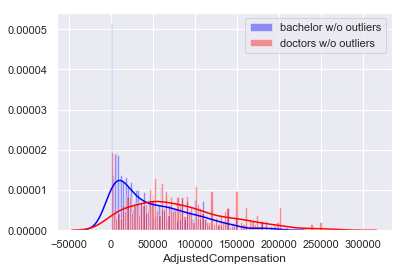

In [141]:
sns.distplot(bachelors_modified, bins = 100, color = 'blue', label = 'bachelor w/o outliers')
sns.distplot(doctors_modified, bins = 100, color = 'red', label = 'doctors w/o outliers')
plt.legend()
plt.show()

## Wages and Education III

Remember the multiple comparisons problem; rather than continuing on like this, perform an ANOVA test between the various 'FormalEducation' categories and their relation to 'AdjustedCompensation'.

In [144]:
#Your code here
from statsmodels.stats import anova
from statsmodels.formula.api import ols
model1 = ols('AdjustedCompensation~FormalEducation', data = data).fit()
result = anova.anova_lm(model1)
print(result)

                     df        sum_sq       mean_sq         F    PR(>F)
FormalEducation     6.0  6.540294e+17  1.090049e+17  0.590714  0.738044
Residual         4335.0  7.999414e+20  1.845309e+17       NaN       NaN


In [146]:
model2 = ols('AdjustedCompensation~FormalEducation', data = data[data.AdjustedCompensation < masters.quantile(0.98)]).fit()
result = anova.anova_lm(model2)
print(result)

                     df        sum_sq       mean_sq          F        PR(>F)
FormalEducation     6.0  4.024018e+11  6.706697e+10  28.335072  2.188106e-33
Residual         4228.0  1.000736e+13  2.366924e+09        NaN           NaN


## Additional Resources

Here's the original source where the data was taken from:  
    [Kaggle Machine Learning & Data Science Survey 2017](https://www.kaggle.com/kaggle/kaggle-survey-2017)

## Summary

In this lab, you practiced conducting actual hypothesis tests on actual data. From this, you saw how dependent results can be on the initial problem formulation, including preprocessing!